## Import Libraries

In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

## Load Dataset

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.shape

(7043, 21)

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Data Cleaning

In [6]:
# missing value
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:
# duplicate value
print(df.duplicated().sum())

0


In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
# edit data types
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")


## Exploratory Data Analysis

### Target Variable Distribution

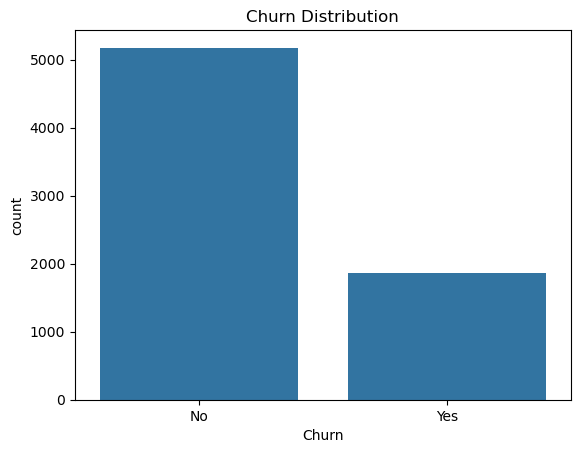

In [10]:
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()


The dataset is moderately imbalanced, with approximately 70% non-churned customers and 30% churned customers. This imbalance should be considered during model evaluation.

### Numerical Features vs Churn

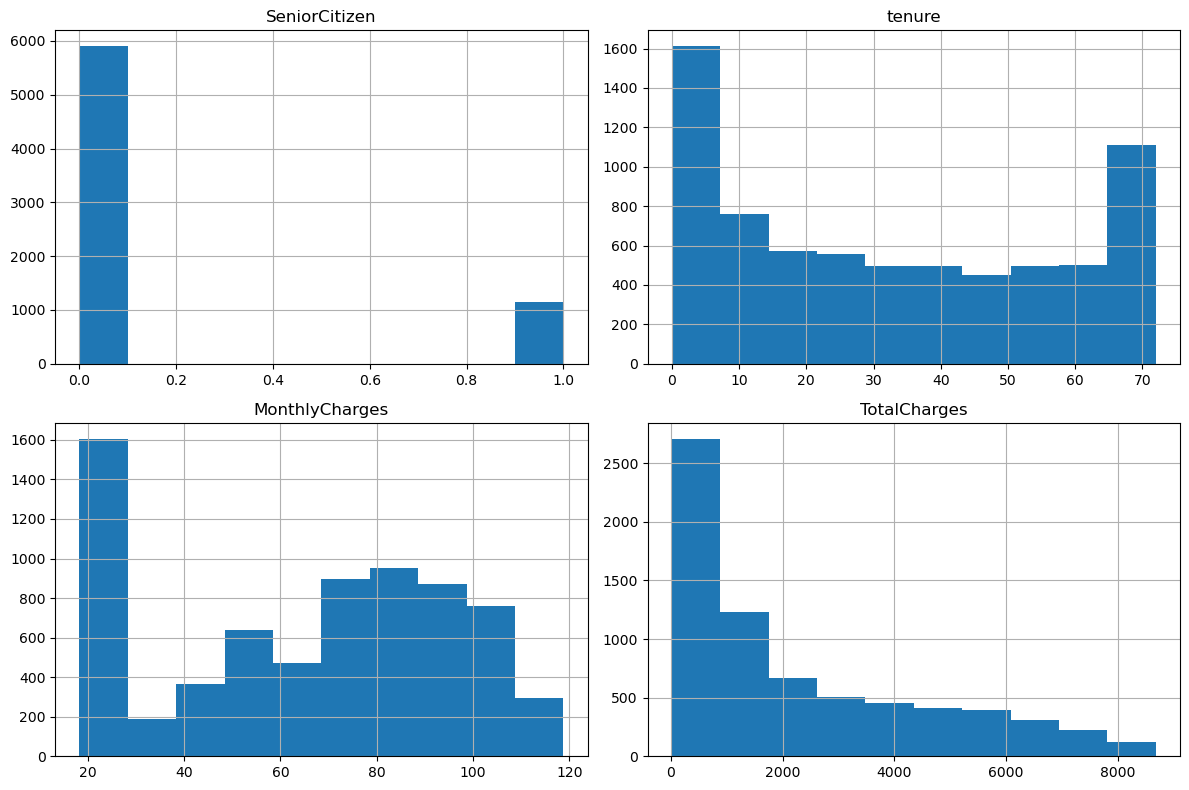

In [11]:
df.select_dtypes(include=np.number).hist(figsize=(12,8))
plt.tight_layout()
plt.show()


Key Insights from Customer Dataset

* **SeniorCitizen**
    Most customers are not senior citizens; they represent only a relatively small portion of the total dataset.
* **Tenure**
    Tenure shows a **bimodal distribution**. There is a high concentration of both newly subscribed and long-term customers, with fewer people in the mid-range.
* **MonthlyCharges**
    These charges are **right-skewed**. Most customers pay between $20$ and $30$, while fewer customers pay high-tier fees.
* **TotalCharges**
    There is a **linear correlation** between total charges and tenure, as charges naturally accumulate over time.

### Categorical Features vs Churn

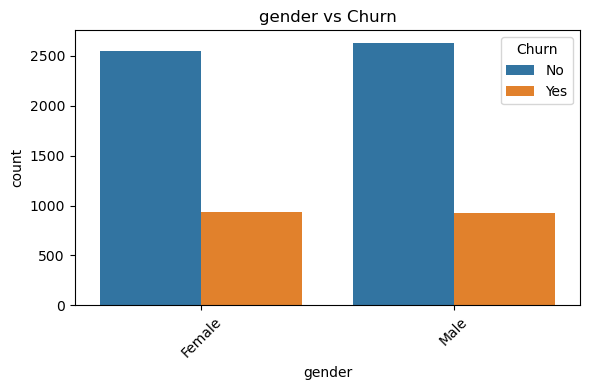

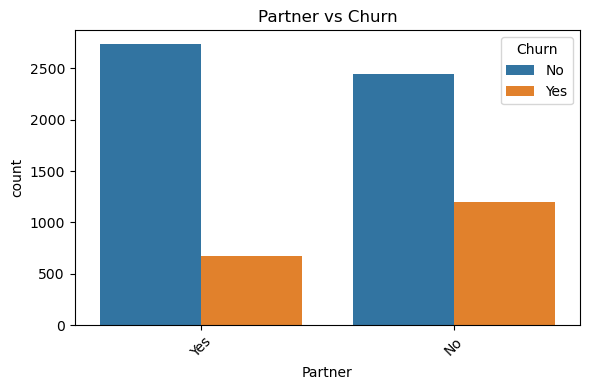

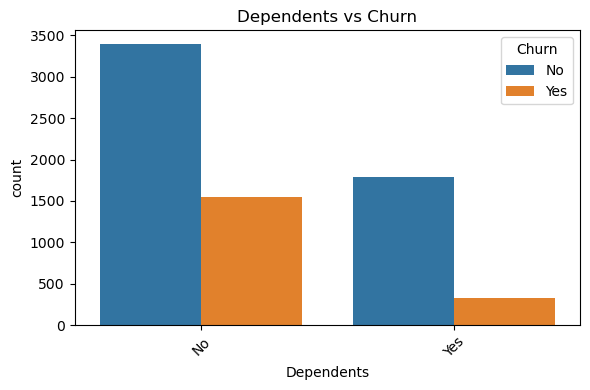

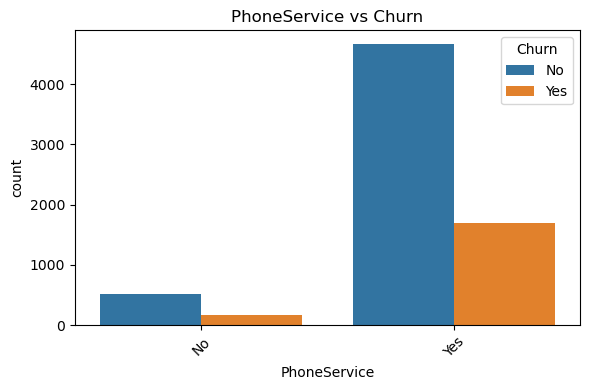

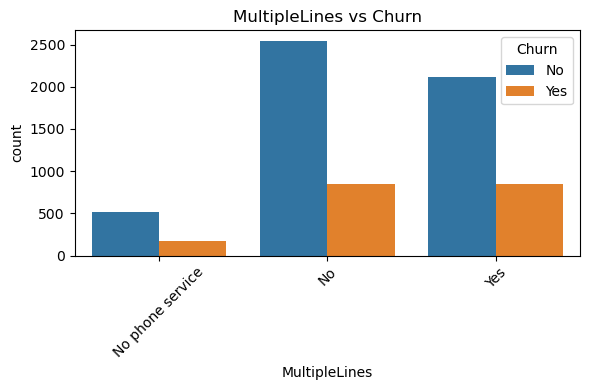

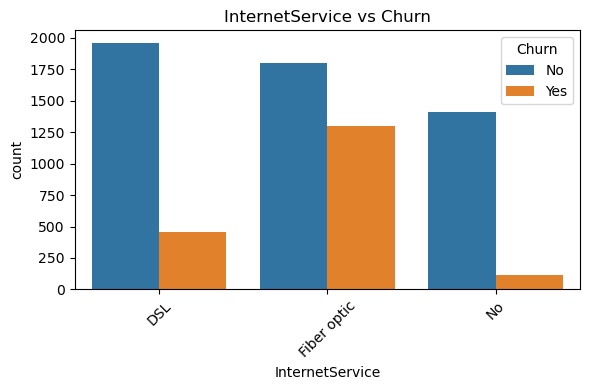

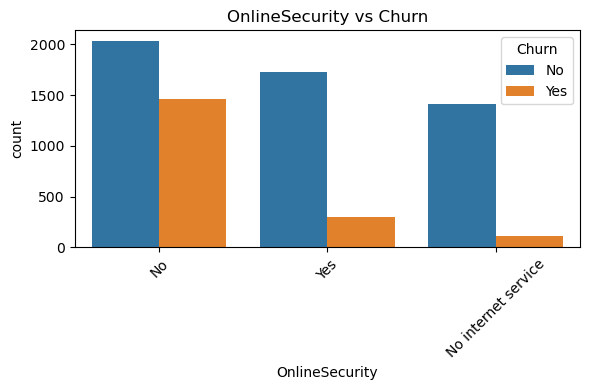

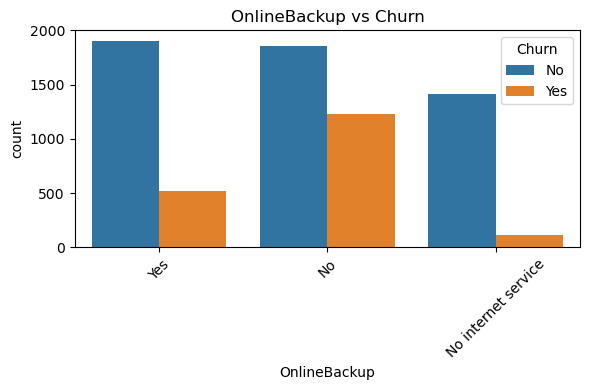

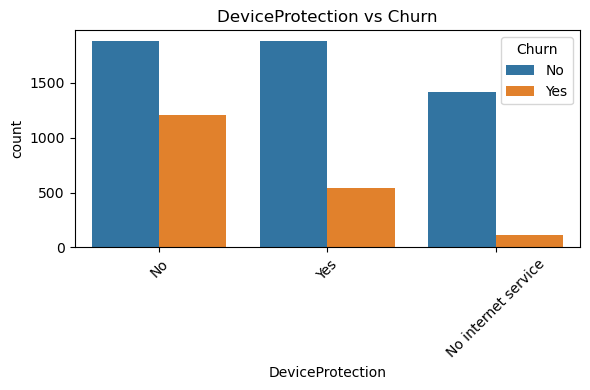

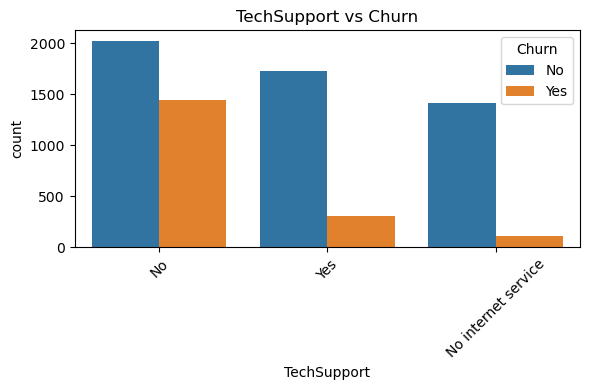

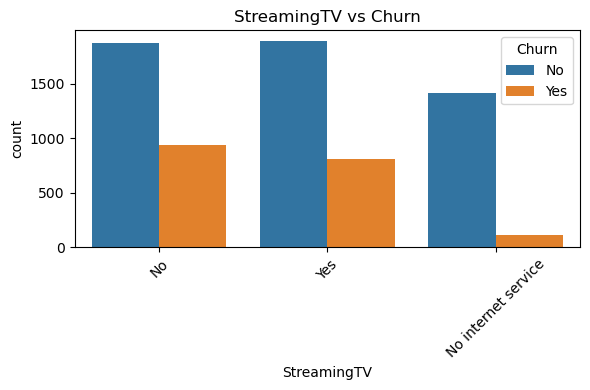

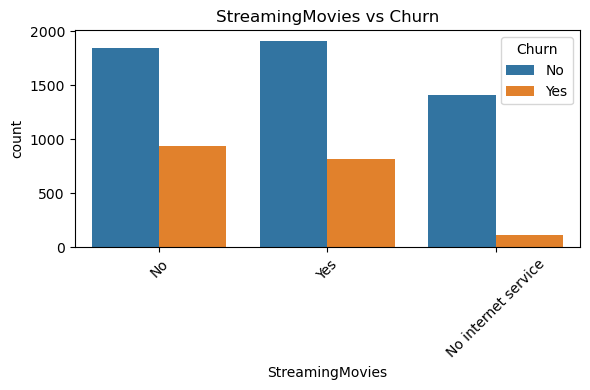

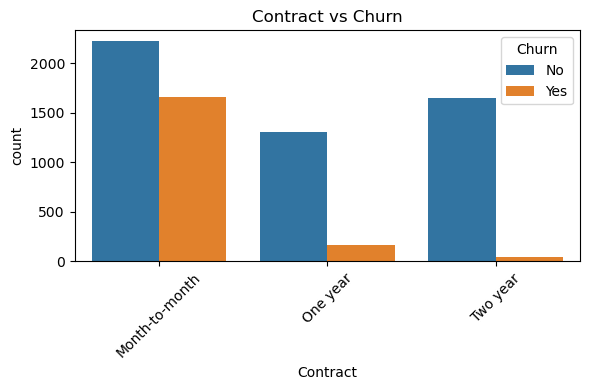

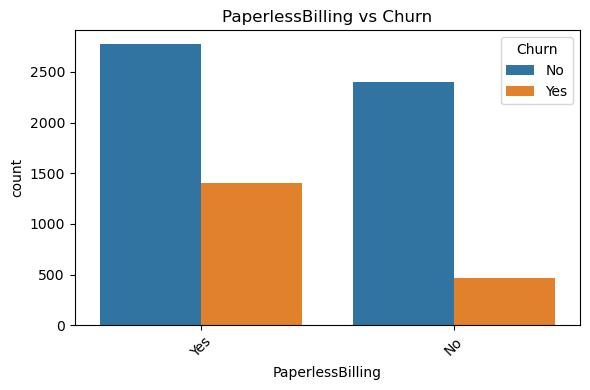

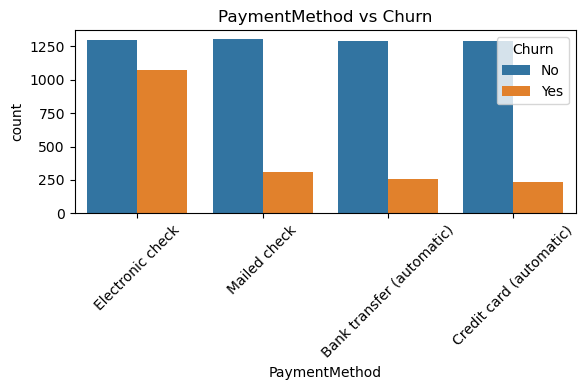

In [21]:
categorical_cols = [
    "gender", "Partner", "Dependents", "PhoneService", "MultipleLines",
    "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
    "PaperlessBilling", "PaymentMethod"
]

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue="Churn", data=df)
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Most categorical variables exhibit varying degrees of association with churn. Demographic variables such as gender show negligible differences, while relationship-related features like partner and dependents display moderate effects. Service-related variables, particularly internet service type, tech support, and online security, demonstrate strong separation in churn behavior. Contract type and payment method emerge as the most influential categorical factors, with month-to-month contracts and electronic check payments associated with significantly higher churn rates.


### Correlation Analysis

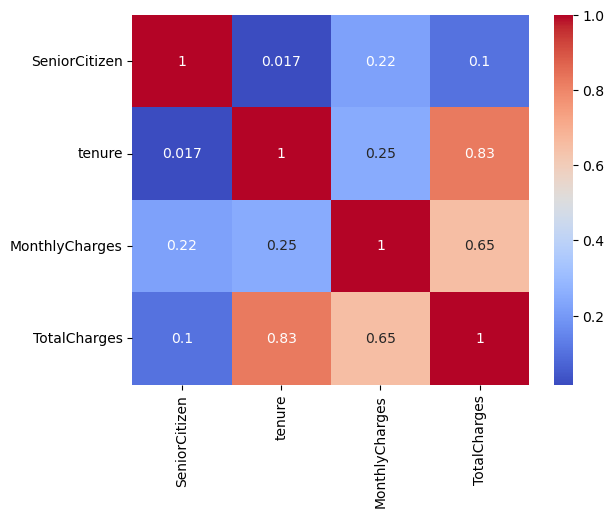

In [13]:
numeric_df = df.select_dtypes(include="number")
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()


Correlation analysis is limited in this dataset due to the dominance of categorical variables. Many key churn drivers, such as contract type and service options, require categorical analysis rather than numeric correlation.

#### Correlation Analysis Insights
Correlation analysis was performed on numeric variables only. Strong correlations were observed between tenure and total charges, which is expected due to the cumulative nature of billing. However, correlation analysis alone is insufficient for identifying churn drivers, as many influential variables are categorical in nature.


## Feature Preparation

In [14]:
X = df.drop("Churn", axis=1)
y = df["Churn"]


## Train-Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X_train.select_dtypes(include=["object"]).columns

In [31]:
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_cols),
        ("cat", cat_transformer, cat_cols)
    ]
)


## Baseline Model

In [32]:
model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Model Evaluation

In [33]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[924 111]
 [166 208]]
              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1035
         Yes       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409



## Conclusion

A baseline logistic regression model achieved an overall accuracy of 80%. However, due to class imbalance, accuracy alone is insufficient. The model performs well in identifying non-churn customers but demonstrates moderate recall for churned customers, indicating that nearly half of churn cases are missed. This suggests the need for class imbalance handling and more expressive models.
